In [3]:
import pandas as pd

In [18]:
def df_reader(file_path):
    dfu = pd.read_csv(file_path, compression = 'gzip', sep = ',', dtype='unicode')
    #renaming the first column to STATION so we can append
    dfu = dfu.rename(columns = {str(dfu.columns[0]) : 'STATION'})
    dfu = dfu.dropna()
    dfu['LATITUDE'] = pd.to_numeric(dfu['LATITUDE'], errors='coerce')
    dfu = dfu.dropna()
    #returning the cleaned data
    return dfu.loc[dfu['LATITUDE'] < -60]

In [19]:
#reading in the 1929 data and cleaning it
df = pd.read_csv('data/1929.tar.gz', compression='gzip', sep=',')
df = df.rename(columns = {'03005099999.csv':'STATION'})
df = df.dropna()
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df = df.dropna()
df = df.loc[df['LATITUDE'] < -60]
len(df)

0

In [20]:
#starting len is the size of the filtered 1929 df
print("starting len:", len(df))
#append the filtered data from 1930 to 2022
for year in range(1930, 2023):
    print(1, year)
    file = f"data/{year}.tar.gz"
    df2 = df_reader(file)
    if list(df2.columns) == list(df.columns):
        df = df.append(df2)
       #print("appended new len", len(df))
    #checking if something went wrong
    else:
        print("Wrong year", year)

starting len: 0
1 1930
1 1931
1 1932
1 1933
1 1934
1 1935
1 1936
1 1937
1 1938
1 1939
1 1940
1 1941
1 1942
1 1943
1 1944
1 1945
1 1946
1 1947
1 1948
1 1949
1 1950
1 1951
1 1952
1 1953
1 1954
1 1955
1 1956
1 1957
1 1958
1 1959
1 1960
1 1961
1 1962
1 1963
1 1964
1 1965
1 1966
1 1967
1 1968
1 1969
1 1970
1 1971
1 1972
1 1973
1 1974
1 1975
1 1976
1 1977
1 1978
1 1979
1 1980
1 1981
1 1982
1 1983
1 1984
1 1985
1 1986
1 1987
1 1988
1 1989
1 1990
1 1991
1 1992
1 1993
1 1994
1 1995
1 1996
1 1997
1 1998
1 1999
1 2000
1 2001
1 2002
1 2003
1 2004
1 2005
1 2006
1 2007
1 2008
1 2009
1 2010
1 2011
1 2012
1 2013
1 2014
1 2015
1 2016
1 2017
1 2018
1 2019
1 2020
1 2021
1 2022


In [51]:
#number of entries
print(len(df))

839323


In [52]:
#checking to see if there are any non-AY stations
print(df['NAME'].unique())

['BROOKS BROOK STP6, US' 'UNKN, AY' 'ARGENTINE ISLAND, UK'
 'SIGNY ISLAND, UK' 'ADMIRALTY BAY, AY' 'DECEPTION IS S SMET IS'
 'ADELAIDE ISLANDS SE, AY' 'MCMURDO SOUND NAF, AY'
 'ADELAIDE ISLANDS EST, AY' 'BASE BELGRANO II, AY' 'LITTLE AMERICA, AY'
 'CAPE CRYSTAL, AY' 'HALLEY, AY' 'BEARDMORE CAMP, AY' 'LIV, AY'
 'PRINCESS ELISABETH, AY' 'BYRD STATION, AY' 'MARBLE POINT, AY'
 'ELLSWORTH IGY, AY' 'WILKES, AY' 'AMUNDSEN SCOTT, AY' 'ADARE HALLETT, AY'
 'N.CENTRAL ANTARCTICA, AY' 'EIGHTS, AY' 'HUT POINT, AY'
 'LITTLE JEANA STATION, AY' 'PLATEAU STATION, AY' 'BROCKTON STATION, AY'
 'FREI CHI BASE, CI' 'PRAT CHI BASE, CI' 'BERNARDO O HIGGINS, CI'
 'ADELAIDE ISLAND, UK' 'BASE ESPERANZA, AY' 'BROWN ARG BASE, AR'
 'SANAE SAF BASE, AY' 'BASE ORCADAS, AR' 'BELGRANO 1 ARG BASE, AR'
 'BELLINGSHAUSEN AWS, AY' 'BYRD USA BASE, AY' 'PETREL ARG BASE, AY'
 'SYOWA, AY' 'MOLODEZNAJA, AY' 'BASE MARAMBIO CENTRO MET. ANTARTICO, AY'
 'NOVOLAZAREVSKAJA, AY' 'DAVIS, AY' 'VOSTOK, AY' 'MIRNYJ, AY' 'CASEY, AY'
 'LENIN

In [149]:
#removing non-AY stations from df
ant_df = df.loc[df['NAME'].str.contains(", AY")]

In [150]:
ant_df = ant_df.reset_index(drop=True)

In [151]:
ant_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,61903099999,1950-07-03,-71.050000,-10.9,37.0,"UNKN, AY",-39.5,4,-43.0,4,...,8.0,999.9,-24.0,*,-45.0,*,0.00,I,999.9,000000
1,61903099999,1950-07-04,-71.050000,-10.9,37.0,"UNKN, AY",-43.5,4,-47.2,4,...,11.1,999.9,-40.0,*,-47.0,*,0.00,I,999.9,000000
2,61903099999,1950-07-05,-71.050000,-10.9,37.0,"UNKN, AY",-39.2,4,-42.7,4,...,13.0,999.9,-29.0,*,-44.0,*,0.00,I,999.9,000000
3,61903099999,1950-07-06,-71.050000,-10.9,37.0,"UNKN, AY",-34.0,4,-37.8,4,...,15.0,999.9,-27.0,*,-38.0,*,0.00,I,999.9,000000
4,61903099999,1950-07-07,-71.050000,-10.9,37.0,"UNKN, AY",-36.0,4,-39.5,4,...,25.1,999.9,-31.0,*,-42.0,*,0.00,I,999.9,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797930,89879099999,2022-03-23,-71.883333,171.2,30.0,"POSSESSION IS, AY",24.9,24,9999.9,0,...,999.9,999.9,29.7,*,23.0,*,0.00,I,999.9,000000
797931,89879099999,2022-03-24,-71.883333,171.2,30.0,"POSSESSION IS, AY",23.1,24,9999.9,0,...,999.9,999.9,26.1,*,19.2,*,0.00,I,999.9,000000
797932,89879099999,2022-03-25,-71.883333,171.2,30.0,"POSSESSION IS, AY",19.8,24,9999.9,0,...,999.9,999.9,22.1,*,18.3,*,0.00,I,999.9,000000
797933,89879099999,2022-03-26,-71.883333,171.2,30.0,"POSSESSION IS, AY",21.7,24,9999.9,0,...,999.9,999.9,22.5,*,20.7,*,0.00,I,999.9,000000


In [156]:
ant_df['TEMP'] = pd.to_numeric(ant_df['TEMP'], errors='coerce')

In [129]:
#Number of stations in Antartica
len(ant_df['NAME'].unique())

187

In [116]:
import sys

In [172]:
sys.path.append('/home/train69/.local/lib/python3.9/site-packages')

In [170]:
!pip install Basemap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 862 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 30.5 MB 60.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 85.9 MB/s eta 0:00:01
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=de9bece87d4c23b496a0ca86cf0a2144db4d467cfaf1c298d99317523978d3e2
  Stored in directory: /home/train69/.cache/pip/wheels/6a/73/a7/3dc684169ab99e26d1e9e25f2a939ea1886209f1b4087b4131
Successfully built pyshp
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.


In [134]:
import geopandas as gpd

In [120]:
geopandas

<module 'geopandas' from '/home/train69/.local/lib/python3.9/site-packages/geopandas/__init__.py'>

In [145]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [206]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

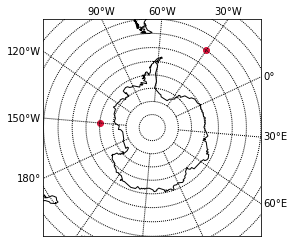

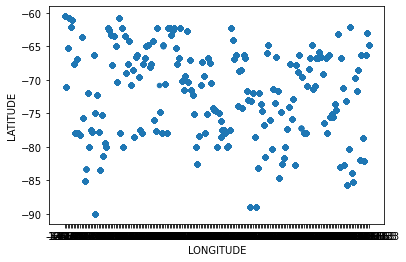

In [222]:
m = Basemap(projection='spstere',boundinglat=-50,
            lon_0=180+(-100+-30)/2.,resolution='c')

m.drawmeridians(np.arange(0,360,30),labels=[1,1,1,0])
m.drawparallels(np.arange(-90,90,5))
m.drawcoastlines()

xll, yll = m(-150,-70) # <-- find those points by looking at meridians and parallels
xur, yur = m(-30,-55)
m.scatter([xll,xur], [yll, yur], c="crimson")
df.plot(x="LONGITUDE", y="LATITUDE", kind="scatter")
plt.show()

In [146]:
df_22 = ant_df.loc[ant_df['DATE'].str.contains("2022")]

In [77]:
#number of active antarctic stations in 2022
len(df_22['NAME'].unique())

63

In [79]:
df_22 = df_22.reset_index(drop=True)

In [80]:
df_22

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,85987199999,2022-01-24,-62.983333,-60.6833333,12.0,"GABRIEL DE CASTILLA, AY",38.3,8,9999.9,0,...,8.7,10.7,39.9,*,36.0,*,0.11,A,999.9,000000
1,85987199999,2022-01-25,-62.983333,-60.6833333,12.0,"GABRIEL DE CASTILLA, AY",35.8,5,9999.9,0,...,20.2,25.4,36.5,*,35.4,*,0.00,I,999.9,000000
2,85987199999,2022-01-26,-62.983333,-60.6833333,12.0,"GABRIEL DE CASTILLA, AY",35.2,21,9999.9,0,...,29.3,37.1,39.9,*,33.3,,0.00,G,999.9,000000
3,85987199999,2022-01-27,-62.983333,-60.6833333,12.0,"GABRIEL DE CASTILLA, AY",36.3,24,9999.9,0,...,31.7,44.7,39.2,*,33.4,,0.10,G,999.9,000000
4,85987199999,2022-01-28,-62.983333,-60.6833333,12.0,"GABRIEL DE CASTILLA, AY",35.9,24,9999.9,0,...,21.4,28.9,40.8,,33.6,,0.00,G,999.9,000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,89879099999,2022-03-23,-71.883333,171.2,30.0,"POSSESSION IS, AY",24.9,24,9999.9,0,...,999.9,999.9,29.7,*,23.0,*,0.00,I,999.9,000000
4517,89879099999,2022-03-24,-71.883333,171.2,30.0,"POSSESSION IS, AY",23.1,24,9999.9,0,...,999.9,999.9,26.1,*,19.2,*,0.00,I,999.9,000000
4518,89879099999,2022-03-25,-71.883333,171.2,30.0,"POSSESSION IS, AY",19.8,24,9999.9,0,...,999.9,999.9,22.1,*,18.3,*,0.00,I,999.9,000000
4519,89879099999,2022-03-26,-71.883333,171.2,30.0,"POSSESSION IS, AY",21.7,24,9999.9,0,...,999.9,999.9,22.5,*,20.7,*,0.00,I,999.9,000000


In [83]:
#Earliest Station:
ant_df.loc[0]

STATION             61903099999
DATE                 1950-07-03
LATITUDE                 -71.05
LONGITUDE                 -10.9
ELEVATION                  37.0
NAME                   UNKN, AY
TEMP                      -39.5
TEMP_ATTRIBUTES               4
DEWP                      -43.0
DEWP_ATTRIBUTES               4
SLP                       993.0
SLP_ATTRIBUTES                4
STP                       999.9
STP_ATTRIBUTES                0
VISIB                      31.1
VISIB_ATTRIBUTES              4
WDSP                        6.3
WDSP_ATTRIBUTES               4
MXSPD                       8.0
GUST                      999.9
MAX                       -24.0
MAX_ATTRIBUTES                *
MIN                       -45.0
MIN_ATTRIBUTES                *
PRCP                       0.00
PRCP_ATTRIBUTES               I
SNDP                      999.9
FRSHTT                   000000
Name: 0, dtype: object

In [87]:
#Most Recent Station:
ant_df.loc[len(ant_df) - 1]

STATION                   89879099999
DATE                       2022-03-27
LATITUDE                   -71.883333
LONGITUDE                       171.2
ELEVATION                        30.0
NAME                POSSESSION IS, AY
TEMP                             17.7
TEMP_ATTRIBUTES                    22
DEWP                           9999.9
DEWP_ATTRIBUTES                     0
SLP                            9999.9
SLP_ATTRIBUTES                      0
STP                             968.9
STP_ATTRIBUTES                     22
VISIB                           999.9
VISIB_ATTRIBUTES                    0
WDSP                            999.9
WDSP_ATTRIBUTES                     0
MXSPD                           999.9
GUST                            999.9
MAX                              22.5
MAX_ATTRIBUTES                      *
MIN                              12.0
MIN_ATTRIBUTES                      *
PRCP                             0.00
PRCP_ATTRIBUTES                     I
SNDP        

In [157]:
# To find avg mean of past 10 years
df_21 = ant_df.loc[ant_df['DATE'].str.contains("2021")]
df_20 = ant_df.loc[ant_df['DATE'].str.contains("2020")]
df_19 = ant_df.loc[ant_df['DATE'].str.contains("2019")]
df_18 = ant_df.loc[ant_df['DATE'].str.contains("2018")]
df_17 = ant_df.loc[ant_df['DATE'].str.contains("2017")]

In [226]:
def plot_temp(d, year):
    months = list(d.keys())
    temps = []
    for ele in months:
        temps.append(d[ele])
    plt.plot(months, temps, label = year)
    plt.legend(loc = "upper right")

In [183]:
temp_dict_21 = {}

for i in range (1,10):
    print(i ,df_21['TEMP'].loc[df_21['DATE'].str.contains(f"2021-0{i}")].mean())
    temp_dict_21[i] = df_21['TEMP'].loc[df_21['DATE'].str.contains(f"2021-0{i}")].mean()
for i in range (10,13):
    print(i ,df_21['TEMP'].loc[df_21['DATE'].str.contains(f"2021-{i}")].mean())
    temp_dict_21[i] = df_21['TEMP'].loc[df_21['DATE'].str.contains(f"2021-0{i}")].mean()

1 17.029426686960935
2 8.955638166047084
3 0.09104834849210205
4 -12.891582974653284
5 -14.294791154791156
6 -17.5957524908233
7 -16.6498033431662
8 -19.75650466372117
9 -12.980425111220983
10 -4.844615384615384
11 9.702904820766367
12 19.880690072639243


In [185]:
temp_dict_20 = {}

for i in range (1,10):
    print(i ,df_20['TEMP'].loc[df_20['DATE'].str.contains(f"2020-0{i}")].mean())
    temp_dict_20[i] = df_20['TEMP'].loc[df_20['DATE'].str.contains(f"2020-0{i}")].mean()
for i in range (10,13):
    print(i ,df_20['TEMP'].loc[df_20['DATE'].str.contains(f"2020-{i}")].mean())
    temp_dict_20[i] = df_20['TEMP'].loc[df_20['DATE'].str.contains(f"2020-0{i}")].mean()

1 18.73753280839894
2 10.363670237540738
3 -4.177517564402811
4 -6.751155624036984
5 -12.16814326107445
6 -14.80882800608827
7 -14.512418655097624
8 -17.37246941045604
9 -10.526287098728055
10 -6.483634431455896
11 9.076355748373096
12 16.885280494081336


In [188]:
temp_dict_19 = {}

for i in range (1,10):
    print(i ,df_19['TEMP'].loc[df_19['DATE'].str.contains(f"2019-0{i}")].mean())
    temp_dict_19[i] = df_19['TEMP'].loc[df_19['DATE'].str.contains(f"2019-0{i}")].mean()
for i in range (10,13):
    print(i ,df_19['TEMP'].loc[df_19['DATE'].str.contains(f"2019-{i}")].mean())
    temp_dict_19[i] = df_19['TEMP'].loc[df_19['DATE'].str.contains(f"2019-0{i}")].mean()

1 16.675190839694668
2 10.091855421686772
3 -1.0210572302315506
4 -8.992377495462799
5 -13.092075471698134
6 -17.134561049445015
7 -15.349669547534305
8 -16.326148744670775
9 -15.71074743527112
10 -5.93129699248121
11 9.514009661835761
12 18.056241729157456


In [189]:
temp_dict_18 = {}

for i in range (1,10):
    print(i ,df_18['TEMP'].loc[df_18['DATE'].str.contains(f"2018-0{i}")].mean())
    temp_dict_18[i] = df_18['TEMP'].loc[df_18['DATE'].str.contains(f"2018-0{i}")].mean()
for i in range (10,13):
    print(i ,df_18['TEMP'].loc[df_18['DATE'].str.contains(f"2018-{i}")].mean())
    temp_dict_18[i] = df_18['TEMP'].loc[df_18['DATE'].str.contains(f"2018-0{i}")].mean()

1 19.973952095808365
2 12.896424010217114
3 3.539469026548676
4 0.04912734324499725
5 -6.326294277929157
6 -6.755114054451794
7 -8.875291545189505
8 -9.69927325581396
9 -11.139001447178002
10 -2.74725388601036
11 8.823156411460785
12 18.140477262494382


In [190]:
temp_dict_17 = {}

for i in range (1,10):
    print(i ,df_17['TEMP'].loc[df_17['DATE'].str.contains(f"2017-0{i}")].mean())
    temp_dict_17[i] = df_17['TEMP'].loc[df_17['DATE'].str.contains(f"2017-0{i}")].mean()
for i in range (10,13):
    print(i ,df_17['TEMP'].loc[df_17['DATE'].str.contains(f"2017-{i}")].mean())
    temp_dict_17[i] = df_17['TEMP'].loc[df_17['DATE'].str.contains(f"2017-0{i}")].mean()

1 19.26051838456902
2 12.858148893360186
3 1.4482084690553818
4 -5.510171730515185
5 -5.140434192672997
6 -12.8867013372957
7 -10.965326633165827
8 -12.01615875265769
9 -10.441301272984434
10 -0.1636835278858529
11 10.807024519549389
12 17.953061224489808


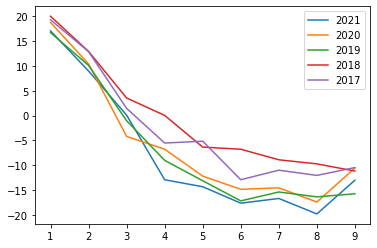

In [227]:
plot_temp(temp_dict_21, "2021")
plot_temp(temp_dict_20, "2020")
plot_temp(temp_dict_19, "2019")
plot_temp(temp_dict_18, "2018")
plot_temp(temp_dict_17, "2017")

In [21]:
#check for the 999 columns

In [220]:
#how many stations: df.len
#how many today: sort by year
#dist plot lat/long - sad graphs
#earliest sort by date get 1st - 1950-07-03
#newest sort by date get last - 2022-03-27
